# 데이터 분석

## t - test

In [1]:
# 통계 검정에 필요한 패키지 다운
pip install scipy

SyntaxError: invalid syntax (<ipython-input-1-38ea9909ffe7>, line 2)

In [2]:
#필요한 패키지 임포트
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 데이터 불러오기
data = pd.read_excel('data_research.xlsx')
data.head()

,case,sex,army,age,grade,couple,live,eat,entertainment,fashion/shopping,...,10_6,10_7,10_8,10_9,10_10,10_11,11,12,13,14
0,1,2,2,20,3,2,2,10.0,5.0,20.0,...,0,1,0.0,0,1,0,3,3,5,4
1,2,2,3,23,3,2,1,15.0,0.0,10.0,...,1,0,0.0,0,0,0,6,5,4,9
2,3,1,1,21,2,2,1,20.0,10.0,10.0,...,0,0,0.0,0,0,0,3,5,8,3
3,4,2,3,20,2,2,2,10.0,0.0,2.0,...,0,0,0.0,0,0,1,8,7,2,2
4,5,1,1,25,4,2,1,20.0,10.0,0.0,...,0,0,0.0,0,0,1,7,6,4,5


In [4]:
# 남여 한글로 바꾸기

data.loc[data['sex'] == 1,'sex'] = '남자'
data.loc[data['sex'] == 2,'sex'] = '여자'

data.head()

,case,sex,army,age,grade,couple,live,eat,entertainment,fashion/shopping,...,10_6,10_7,10_8,10_9,10_10,10_11,11,12,13,14
0,1,여자,2,20,3,2,2,10.0,5.0,20.0,...,0,1,0.0,0,1,0,3,3,5,4
1,2,여자,3,23,3,2,1,15.0,0.0,10.0,...,1,0,0.0,0,0,0,6,5,4,9
2,3,남자,1,21,2,2,1,20.0,10.0,10.0,...,0,0,0.0,0,0,0,3,5,8,3
3,4,여자,3,20,2,2,2,10.0,0.0,2.0,...,0,0,0.0,0,0,1,8,7,2,2
4,5,남자,1,25,4,2,1,20.0,10.0,0.0,...,0,0,0.0,0,0,1,7,6,4,5


In [5]:
# 일표본 t 검정
# 평균이 내가 생각한 값이라고 할 수 있는지
result = stats.ttest_1samp(data['eat'], 15)
print(result)
print('t : {:.3f} \np-value : {:.17f}'.format(result[0], result[1]))

Ttest_1sampResult(statistic=8.7835045343761, pvalue=3.653985656242255e-17)
t : 8.784 
p-value : 0.00000000000000004


In [6]:
# 독립표본 t 검정
# 두 집간의 평균의 차이가 있는지

# 등분산 검정

result = stats.levene(data.loc[data['sex'] == '남자', 'eat'],
                     data.loc[data['sex'] == '여자', 'eat'])
print(result)

LeveneResult(statistic=0.16574068599870195, pvalue=0.6841255249275369)


In [7]:
# 독립표폰 t 검정

# 식비 비교
result = stats.ttest_ind(data.loc[data['sex'] == '남자', 'eat'],
                     data.loc[data['sex'] == '여자', 'eat'],
                         equal_var=True) # 등분산성 위배되면 false
print(result)

Ttest_indResult(statistic=1.5330534041687252, pvalue=0.12598963041683306)


In [8]:
# 패션/쇼핑 비교
result = stats.levene(data.loc[data['sex'] == '남자', 'fashion/shopping'],
                     data.loc[data['sex'] == '여자', 'fashion/shopping'])
print(result)



result = stats.ttest_ind(data.loc[data['sex'] == '남자', 'fashion/shopping'],
                     data.loc[data['sex'] == '여자', 'fashion/shopping'],
                         equal_var=False)
print(result)

LeveneResult(statistic=0.34156596215821233, pvalue=0.5592296823462897)
Ttest_indResult(statistic=-3.714609382613695, pvalue=0.00023021209481849391)


In [9]:
# 아노바 검정 ( 분산 분석 )

In [10]:
data.value_counts('age')

age
19    141
20    115
21     54
23     41
22     31
24     24
18     16
25     11
26      2
28      2
dtype: int64

In [11]:
# 만 19,20,21살을 대상으로 비교
group19 = data[data['age'] == 19]
group20 = data[data['age'] == 20]
group21 = data[data['age'] == 21]

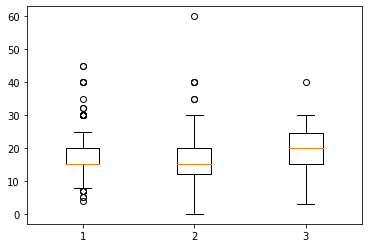

In [12]:
plt.boxplot([group19['eat'], group20['eat'], group21['eat']])
plt.show()

In [13]:
# h0 : 나이별 식비의 차이는 없을 것이다.
# h1 : 나이별 식비의 차이가 있을 것이다.

In [14]:
# 일원 분산 분석
result = stats.f_oneway(group19['eat'], group20['eat'], group21['eat'])
print(result)

F_onewayResult(statistic=1.2073494089591137, pvalue=0.30040432057699173)


In [15]:
# 토탈 소비금액으로 비교

# 일원 분산 분석
result = stats.f_oneway(group19['total'], group20['total'], group21['total'])
print(result)

F_onewayResult(statistic=4.414800080310521, pvalue=0.012874523203138928)


In [16]:
pair = pd.concat([group19[['age','total']],
                  group20[['age','total']],
                  group21[['age','total']]])
pair.head()

,age,total
24,19,30.0
38,19,82.0
39,19,55.0
40,19,70.0
49,19,50.0


In [17]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
print(pairwise_tukeyhsd(pair['total'], pair['age']))

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    19     20   0.1624    0.9 -5.8431  6.1678  False
    19     21   9.1007 0.0149  1.4519 16.7495   True
    20     21   8.9383 0.0217  1.0537 16.8229   True
----------------------------------------------------


Figure(720x432)


c:\users\kyun\appdata\local\programs\python\python39\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


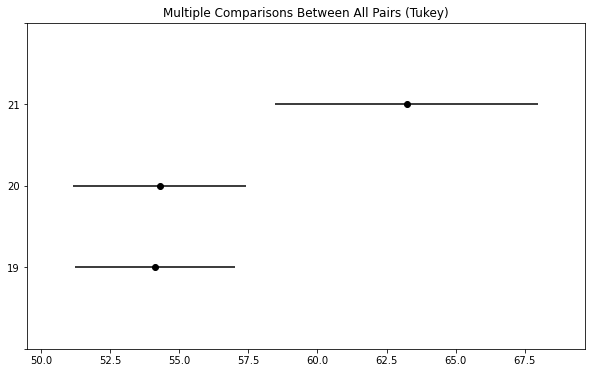

In [18]:
print(pairwise_tukeyhsd(pair['total'], pair['age']).plot_simultaneous())

### 19살 20살 21살의 식비는 같으나 총 소비금액은 다르다고 할 수 있다.

### 사후검정 결과 19 20살은 차이가 없다고 할 수 있다.

## 카이제곱 테스트


In [19]:
data.columns

Index([             'case',               'sex',              'army',
                     'age',             'grade',            'couple',
                    'live',               'eat',     'entertainment',
        'fashion/shopping',           'culture',            'beauty',
                     'edu',           'healthy',              'life',
                  'saving',             'total',              'eat2',
          'entertainment2', 'fashion/shopping2',          'culture2',
                 'beauty2',              'edu2',          'healthy2',
                   'life2',           'saving2',            'total2',
                         9,              '10_1',              '10_2',
                    '10_3',              '10_4',              '10_5',
                    '10_6',              '10_7',              '10_8',
                    '10_9',             '10_10',             '10_11',
                        11,                  12,                  13,
                    

### 남여에 따라 커플, 솔로가 차이가 있는지 카이제곱 검정으로 알아보자 

In [20]:
# 커플 한글로 바꾸기

data.loc[data['couple'] == 1,'couple'] = '커플'
data.loc[data['couple'] == 2,'couple'] = '솔로'



# 카이제곱 분석을 위한 교차표 만들기

table = pd.crosstab(data['sex'],data['couple'])
table

couple,솔로,커플
sex,,
남자,168,40
여자,156,73


In [21]:
result = stats.chi2_contingency(table)
print(result)

(8.445753945909178, 0.003658967148629325, 1, array([[154.21510297,  53.78489703],
       [169.78489703,  59.21510297]]))


In [22]:
# 문자 앞에 f를 붙이면 중괄호안에 변수 넣기 가능 f-string
print(f'카이 스퀘어 값 : {result[0]}',
      f"p-value (0.05): {result[1]}",
      f"자유도 수: {result[2]}",
      f"기대값: \n{pd.DataFrame(result[3])}",
      f"측정값: \n{table}", sep = "\n")

카이 스퀘어 값 : 8.445753945909178
p-value (0.05): 0.003658967148629325
자유도 수: 1
기대값: 
            0          1
0  154.215103  53.784897
1  169.784897  59.215103
측정값: 
couple   솔로  커플
sex            
남자      168  40
여자      156  73


In [23]:
chi_data = table.melt(ignore_index=False)

In [24]:
chi_data

,couple,value
sex,,
남자,솔로,168
여자,솔로,156
남자,커플,40
여자,커플,73


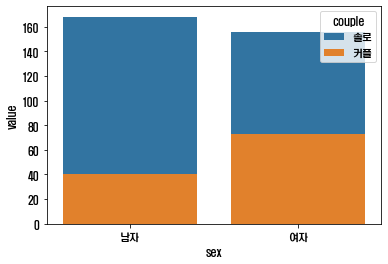

In [25]:
import matplotlib

font_name = matplotlib.font_manager.FontProperties(fname='C:/Windows/Fonts/H2HDRM.TTF').get_name()
matplotlib.rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus'] = False  # matplotlib 에 한국어 폰트 적용


sns.barplot(x = chi_data.index , y='value', hue='couple', data=chi_data,
           dodge=False)
plt.show()

In [26]:
## 회귀분석

In [27]:
import statsmodels.api as sm

In [28]:
data_w = pd.read_csv('data_weather.csv')
data_w

,날짜,시도지역,일수,발생건수(건),일평균 발생건수(건),평균기온(°C),평균최고기온(°C),평균최저기온(°C),평균일교차(°C),평균상대습도(%),월합강수량(00~24h만)(mm),SO2(ppm),NO2(ppm),CO(ppm),PM-10(ug/m3),월별 인구수,0~14세,65세 이상,취약계층,취약계층비율
0,201401,서울,31,186096,6003,-0.7,3.5,-4.9,8.4,50,13.0,0.007,0.042,0.7,57,10143164,1286747,1167971,2454718,0.242007
1,201402,서울,28,203884,7282,1.9,6.6,-1.8,8.4,52,16.2,0.006,0.039,0.6,57,10144173,1282865,1173044,2455909,0.242100
2,201403,서울,31,187153,6037,7.9,13.1,3.5,9.6,60,7.2,0.007,0.037,0.5,60,10141727,1278461,1178004,2456465,0.242214
3,201404,서울,30,210748,7025,14.0,19.6,9.4,10.2,60,31.0,0.006,0.040,0.5,58,10137313,1274956,1181329,2456285,0.242301
4,201405,서울,31,180015,5807,18.9,25.3,13.8,11.5,59,63.0,0.006,0.032,0.5,63,10133734,1271744,1185221,2456965,0.242454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,201802,대전,28,18480,660,-0.4,5.6,-5.7,11.3,53,40.5,0.004,0.028,0.5,56,1499187,207659,182109,389768,0.259986
320,201803,대전,31,22269,718,8.7,14.9,3.1,11.8,70,108.4,0.002,0.022,0.4,52,1497572,206714,182965,389679,0.260207
321,201804,대전,30,27716,924,13.9,20.3,7.8,12.5,64,155.3,0.002,0.017,0.4,60,1496123,205855,183605,389460,0.260313
322,201805,대전,31,25320,817,19.2,24.7,14.0,10.7,70,95.9,0.002,0.014,0.3,47,1495234,205191,184439,389630,0.260581


In [29]:
data_w.columns

Index(['날짜', '시도지역', '일수', '발생건수(건)', '일평균 발생건수(건)', '평균기온(°C)', '평균최고기온(°C)',
       '평균최저기온(°C)', '평균일교차(°C)', '평균상대습도(%)', '월합강수량(00~24h만)(mm)',
       'SO2(ppm)', 'NO2(ppm)', 'CO(ppm)', 'PM-10(ug/m3)', '월별 인구수', '0~14세',
       '65세 이상', '취약계층', '취약계층비율'],
      dtype='object')

In [30]:
data_w.columns = ['날짜', '시도지역', '일수', '발생건수', '일평균 발생건수', '평균기온', '평균최고기온',
       '평균최저기온', '평균일교차', '평균상대습도', '월합강수량',
       'SO2', 'NO2', 'CO', 'PM10', '월별 인구수', '0~14세',
       '65세 이상', '취약계층', '취약계층비율']

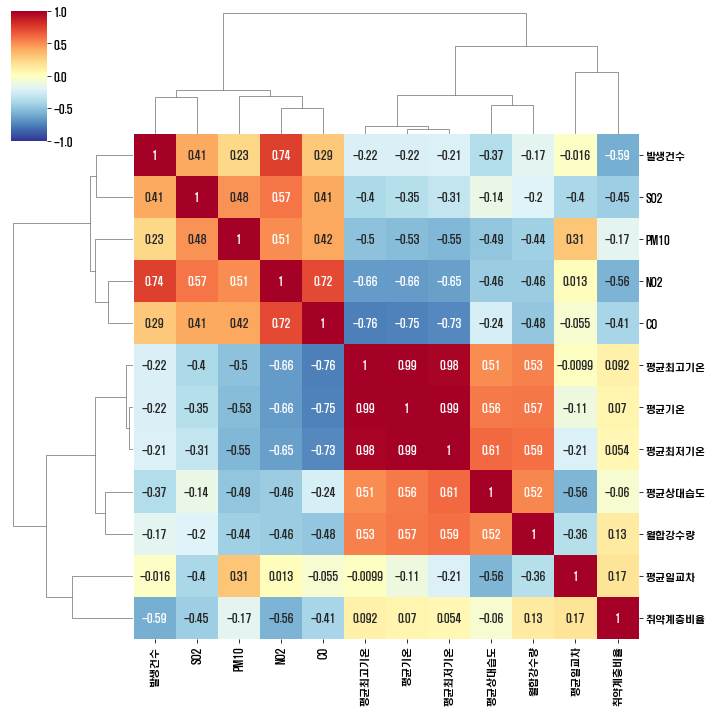

In [31]:
data_corr = data_w[['발생건수','평균기온', '평균최고기온',
       '평균최저기온', '평균일교차', '평균상대습도', '월합강수량',
       'SO2', 'NO2', 'CO', 'PM10','취약계층비율'
                   ]].corr()

sns.clustermap(data_corr,
               annot=True,  # 실제 값 화면에 나타내기
               cmap='RdYlBu_r',  # Red, Yellow, Blue 로 색상 표시
               vmin=-1, vmax=1  # 컬러차트 -1 ~ 1 범위로 표시
               )

#### 상관계수를 보니 알수 있는것
#### 1. 기온관련된 3개의 변수는 상관관계가 높아서 제거를 해야겠다.
#### 2. 미세먼지 관련된 변수도 관련성이 높으나 잘 모르니 제거하지 말아야겠다.

In [32]:
from statsmodels.formula.api import ols

res = ols('발생건수 ~ NO2', data=data_w).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   발생건수   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     399.9
Date:                Sun, 30 May 2021   Prob (F-statistic):           2.13e-58
Time:                        13:26:37   Log-Likelihood:                -3800.1
No. Observations:                 324   AIC:                             7604.
Df Residuals:                     322   BIC:                             7612.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.954e+04   5831.324     -8.496      0.000    -6.1e+04   -3.81e+04
NO2         4.911e+06   2.46e+05     19.997      0.000    4.43e+06    5.39e+06
==============================================================================
Omnibus:                        5.578   Durbin-Watson:                   0.369
Prob(Omnibus):                  0.061   Jarque-Bera (JB):                5.591
Skew:                           0.322   Prob(JB):                       0.0611
Kurtosis:                       2.975   Cond. No.                         147.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
res.params

Intercept   -4.954267e+04
NO2          4.911391e+06
dtype: float64

## 확인해야 할 것

### R-squared : 모형 적합도(결정계수)라고 하며 독립변수가 종속변수를 얼마나 설명하는지 나타내는 지수

### Adj. R-squared : 수정결정계수라고 한다. 독립변수의 개수와 표본의 크기를 고려하여 결정계수를 보정해 다중회귀분석에서 서로다른 모형을 비교할때 사용한다.

### Prob (F-statistic) : 회귀모형에 대한 통계적 유의미성 결과, 0.05보다 낮아야 유의미함
    
### coef : 독립변수의 추정치로 독립변수가 1증가할때 y는 coef 만큼 증가한다고 볼 수 있다. 이 값이 높을 수록 종속변수에 영향을 많이준다고 할 수 있다.
    

In [34]:
# 회귀분석 가정 만족

In [35]:

import scipy.stats
import seaborn as sns

In [36]:
fitted = res.predict(data_w['NO2'])

In [37]:
residual = data_w['발생건수'] - fitted

In [38]:
sr = scipy.stats.zscore(residual)

In [39]:
(x,y),_ = scipy.stats.probplot(sr)

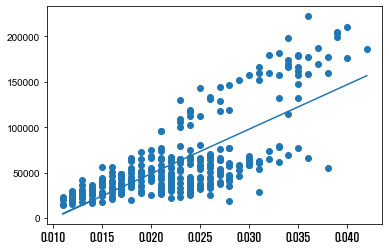

In [40]:
# 적합시킨 직선 시각화

import matplotlib.pyplot as plt                     # 파이썬 시각화 라이브러리 
 
plt.yticks(fontname = "Arial")                      
plt.scatter(data_w['NO2'],data_w['발생건수'])               # 실제 데이터 분포를 알아보기 위한산점도 표기 방법이다. 
                                                    # 점의 label은 "data"로 정해주었다.
plt.plot(data_w['NO2'],fitted,label = "result")               # 회귀선 표기를 위한 선형 그래프이다
#                                                     # label은 "result"로 정해주었다.
# plt.legend()                                        # plt.legend()함수는 범주를 plot에 그리는 함수이다.
# plt.show()

In [41]:
# 잔차의 정규성

c:\users\kyun\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


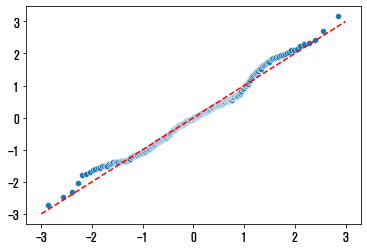

In [42]:
sns.scatterplot(x,y)
plt.plot([-3,3],[-3,3],'--', color='red')

In [43]:
scipy.stats.shapiro(residual)

ShapiroResult(statistic=0.9855484366416931, pvalue=0.0024736332707107067)

#### 샤피로 테스트에서 h0는 잔차는 정규성을 따른다 이므로 정규성 위반

In [44]:
# 잔차의 등분산성

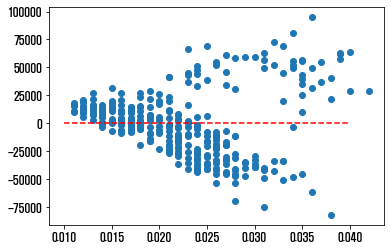

In [45]:
plt.scatter(data_w['NO2'],residual) 
plt.plot([0.01,0.04],[0,0],'--', color='red')

## 아주 고르게 분포되어있진 않지만, 어느정도 그룹이 나뉘어져 있는거 같다.
## 다른 변수를 추가 고려해야한다.

In [46]:
# 다중회귀분석
# 로지스틱분석
# 

In [48]:
# 다중 회귀 분석

In [49]:
data_w.columns

Index(['날짜', '시도지역', '일수', '발생건수', '일평균 발생건수', '평균기온', '평균최고기온', '평균최저기온',
       '평균일교차', '평균상대습도', '월합강수량', 'SO2', 'NO2', 'CO', 'PM10', '월별 인구수',
       '0~14세', '65세 이상', '취약계층', '취약계층비율'],
      dtype='object')

In [66]:
data_w.shape[1]

20

In [83]:
# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
x_data = data_w[['NO2','평균기온','평균일교차','평균상대습도','월합강수량']]

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_data.values, i) for i in range(x_data.shape[1])]
vif["features"] = x_data.columns
vif

,VIF Factor,features
0,14.948740,NO2
1,7.616603,평균기온
2,14.359959,평균일교차
3,26.867532,평균상대습도
4,3.335866,월합강수량


In [84]:
# 다중 공선성이 10이 넘으면 제거 고려, 하나씩 제거하면서 vif확인
vif = pd.DataFrame()
x_data = x_data.drop("평균상대습도",axis=1)
vif["VIF Factor"] = [variance_inflation_factor(x_data.values, i) for i in range(x_data.shape[1])]
vif["features"] = x_data.columns
vif

,VIF Factor,features
0,9.201434,NO2
1,5.294141,평균기온
2,13.287768,평균일교차
3,2.938036,월합강수량


In [85]:
# 다중 공선성이 10이 넘으면 제거 고려, 하나씩 제거하면서 vif확인
vif = pd.DataFrame()
x_data = x_data.drop("평균일교차",axis=1)
vif["VIF Factor"] = [variance_inflation_factor(x_data.values, i) for i in range(x_data.shape[1])]
vif["features"] = x_data.columns
vif

,VIF Factor,features
0,1.914625,NO2
1,3.652156,평균기온
2,2.853524,월합강수량


In [86]:
res = ols('발생건수 ~ NO2+평균기온+월합강수량',
          data=data_w).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   발생건수   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     231.6
Date:                Sun, 30 May 2021   Prob (F-statistic):           7.68e-80
Time:                        14:01:28   Log-Likelihood:                -3743.9
No. Observations:                 324   AIC:                             7496.
Df Residuals:                     320   BIC:                             7511.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.304e+05   8580.358    -15.199      0.000   -1.47e+05   -1.14e+05
NO2         7.033e+06   2.78e+05     25.345      0.000    6.49e+06    7.58e+06
평균기온        2174.1654    221.696      9.807      0.000    1737.999    2610.332
월합강수량         30.6476     18.444      1.662      0.098      -5.639      66.934
==============================================================================
Omnibus:                       10.700   Durbin-Watson:                   0.700
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               17.786
Skew:                           0.179   Prob(JB):                     0.000137
Kurtosis:                       4.091   Cond. No.                     2.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

c:\users\kyun\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\kyun\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\kyun\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword w

<AxesSubplot:xlabel='월합강수량', ylabel='발생건수'>

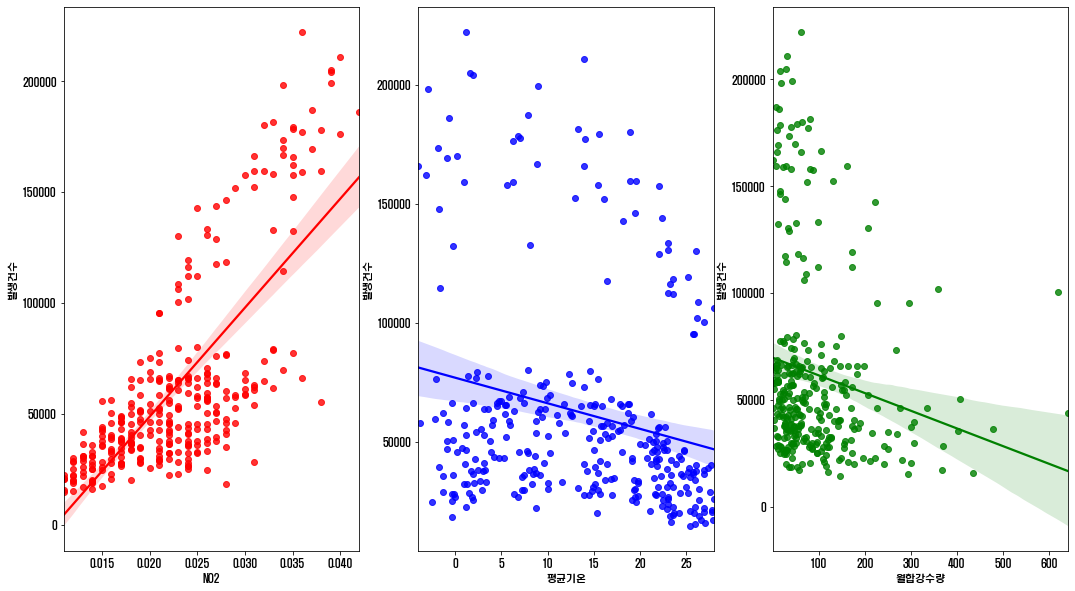

In [87]:
plt.figure(figsize=[18,10])
plt.subplot(1, 3, 1)   # 1 x 3 그래프 배열에서 첫 번째 그래프
sns.regplot('NO2', '발생건수', data=data_w, color='red')
plt.subplot(1, 3, 2)   # 1 x 3 그래프 배열에서 두 번째 그래프
sns.regplot('평균기온', '발생건수', data=data_w, color='blue')
plt.subplot(1, 3, 3)   # 1 x 3 그래프 배열에서 세 번째 그래프
sns.regplot('월합강수량', '발생건수', data=data_w, color='green')
